In [1]:
a = 1
print(a)

1


In [7]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os

In [128]:

import os
import glob
import pandas as pd

# Dossier contenant les fichiers Excel
dossier = r'C:\Users\jrubio\hcl_data\data\01_raw'

# Modèle de fichier Excel que vous recherchez (commençant par "Aiolos")
pattern = 'AIOLOS_*_cleaned.xlsx'

# Créez un dictionnaire pour stocker les DataFrames
dataframes = {}

# Parcourez les fichiers correspondant au modèle
for fichier in glob.glob(os.path.join(dossier, pattern)):
    # Lisez le fichier Excel en tant que dictionnaire de DataFrames (chaque feuille est un DataFrame)
    xls = pd.ExcelFile(fichier)
    
    # Obtenez le nom du fichier sans extension
    nom_fichier = os.path.splitext(os.path.basename(fichier))[0]
    
    # Créez un sous-dictionnaire pour stocker les DataFrames de chaque feuille
    dataframes[nom_fichier] = {}
    
    # Parcourez chaque feuille et stockez-la dans le sous-dictionnaire
    for nom_feuille in xls.sheet_names:
        # Vérifiez si la feuille s'appelle "Extraction"
        if nom_feuille == "Extraction":
            # Lisez la feuille et stockez-la dans le sous-dictionnaire
            dataframes[nom_fichier][nom_feuille] = pd.read_excel(fichier, sheet_name=nom_feuille)
            

excel_file_names = list(dataframes.keys())

concatenated_dataframes = []

# Parcourez chaque fichier Excel dans le dictionnaire
for nom_fichier, feuilles in dataframes.items():
    # Liste pour stocker les DataFrames concaténés de chaque feuille du fichier Excel
    concatenated_sheets = []
    
    # Parcourez chaque feuille du fichier Excel
    for nom_feuille, dataframe in feuilles.items():
        # Concaténez les tables de chaque feuille de haut en bas
        concatenated_sheets.append(dataframe)
    
    # Concaténez les tables de chaque feuille de chaque fichier Excel de haut en bas
    concatenated_dataframes.append(pd.concat(concatenated_sheets, ignore_index=True, sort=False, axis=0))

# Concaténez les tables de chaque fichier Excel de haut en bas
dataframe_2022_2023 = pd.concat(concatenated_dataframes, ignore_index=True, sort=False, axis=0)
dataframe_2022_2023 = dataframe_2022_2023.rename(columns=lambda x: x.strip())
dataframe_2022_2023['DATE_EXTRACT'] = pd.to_datetime(dataframe_2022_2023['DATE_EXTRACT']).dt.date 
dataframe_2022_2023

,DATE_EXTRACT,ANNEE_PASSAGE,SEMAINE_PASSAGE,SEMAINE_PASSAGE_LIB,CLASSE_AGE,DIAGNOSTIC_CODE,DIAGNOSTIC_LIB,PASSAGE_NB,PASSAGE_DIAG_NB
0,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J00,J00 - Rhinopharyngite (aiguë) [rhume banal],738,94
1,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J02.0,J02.0 - Pharyngite à streptocoques,738,2
2,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J02.9,"J02.9 - Pharyngite (aiguë), sans précision",738,18
3,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J04.0,J04.0 - Laryngite (aiguë),738,17
4,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J11.1,J11.1 - Grippe avec d'autres manifestations re...,738,0
...,...,...,...,...,...,...,...,...,...
5737,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,J12.9,"J12.9 - Pneumopathie virale, sans précision",104,0
5738,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,J17.0,J17.0 - Pneumopathie au cours de maladies bact...,104,2
5739,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,J18.9,"J18.9 - Pneumopathie, sans précision",104,8
5740,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,U07.10,"U07.10 - COVID-19, forme respiratoire, virus i...",104,0


In [129]:

import os
import glob
import pandas as pd

# Dossier contenant les fichiers Excel
dossier = r'C:\Users\jrubio\hcl_data\data\01_raw'

# Modèle de fichier Excel que vous recherchez (commençant par "Aiolos")
pattern = 'Extract_HCL_Emergency_Unit_Aiolos_*_cleaned.xlsx'

# Créez un dictionnaire pour stocker les DataFrames
dataframes = {}

# Parcourez les fichiers correspondant au modèle
for fichier in glob.glob(os.path.join(dossier, pattern)):
    # Lisez le fichier Excel en tant que dictionnaire de DataFrames (chaque feuille est un DataFrame)
    xls = pd.ExcelFile(fichier)
    
    # Obtenez le nom du fichier sans extension
    nom_fichier = os.path.splitext(os.path.basename(fichier))[0]
    
    # Créez un sous-dictionnaire pour stocker les DataFrames de chaque feuille
    dataframes[nom_fichier] = {}
    
    # Parcourez chaque feuille et stockez-la dans le sous-dictionnaire
    for nom_feuille in xls.sheet_names:
        # Vérifiez si la feuille s'appelle "Extraction"
        if nom_feuille == "Extraction":
            # Lisez la feuille et stockez-la dans le sous-dictionnaire
            dataframes[nom_fichier][nom_feuille] = pd.read_excel(fichier, sheet_name=nom_feuille)
            

excel_file_names = list(dataframes.keys())

concatenated_dataframes = []

# Parcourez chaque fichier Excel dans le dictionnaire
for nom_fichier, feuilles in dataframes.items():
    # Liste pour stocker les DataFrames concaténés de chaque feuille du fichier Excel
    concatenated_sheets = []
    
    # Parcourez chaque feuille du fichier Excel
    for nom_feuille, dataframe in feuilles.items():
        # Concaténez les tables de chaque feuille de haut en bas
        concatenated_sheets.append(dataframe)
    
    # Concaténez les tables de chaque feuille de chaque fichier Excel de haut en bas
    concatenated_dataframes.append(pd.concat(concatenated_sheets, ignore_index=True, sort=False, axis=0))

# Concaténez les tables de chaque fichier Excel de haut en bas
updates = pd.concat(concatenated_dataframes, ignore_index=True, sort=False, axis=0)
updates = updates.rename(columns=lambda x: x.strip())

updates['DATE_EXTRACT'] = pd.to_datetime(updates['DATE_EXTRACT']).dt.date 
latest_date = updates['DATE_EXTRACT'].max()
latest_updates = updates.loc[updates['DATE_EXTRACT'] == latest_date]
latest_updates = latest_updates.reset_index(drop=True)


In [130]:
latest_updates

,DATE_EXTRACT,ANNEE_PASSAGE,SEMAINE_PASSAGE,SEMAINE_PASSAGE_LIB,CLASSE_AGE,DIAGNOSTIC_CODE,DIAGNOSTIC_LIB,PASSAGE_NB,PASSAGE_DIAG_NB
0,2023-12-18,2023,39,2023 - 39 - 25/09/23 - 01/10/23,<1,J00,J00 - Rhinopharyngite (aiguë) [rhume banal],27,7
1,2023-12-18,2023,39,2023 - 39 - 25/09/23 - 01/10/23,<1,J21.9,"J21.9 - Bronchiolite (aiguë), sans précision",27,3
2,2023-12-18,2023,39,2023 - 39 - 25/09/23 - 01/10/23,1-4,J00,J00 - Rhinopharyngite (aiguë) [rhume banal],94,11
3,2023-12-18,2023,39,2023 - 39 - 25/09/23 - 01/10/23,1-4,J02.0,J02.0 - Pharyngite à streptocoques,94,0
4,2023-12-18,2023,39,2023 - 39 - 25/09/23 - 01/10/23,1-4,J02.9,"J02.9 - Pharyngite (aiguë), sans précision",94,3
...,...,...,...,...,...,...,...,...,...
672,2023-12-18,2023,50,2023 - 50 - 11/12/23 - 17/12/23,65+,J44.0,J44.0 - Maladie pulmonaire obstructive chroniq...,569,0
673,2023-12-18,2023,50,2023 - 50 - 11/12/23 - 17/12/23,65+,U07.10,"U07.10 - COVID-19, forme respiratoire, virus i...",569,17
674,2023-12-18,2023,50,2023 - 50 - 11/12/23 - 17/12/23,65+,U07.11,"U07.11 - COVID-19, forme respiratoire, virus n...",569,0
675,2023-12-18,2023,50,2023 - 50 - 11/12/23 - 17/12/23,65+,U07.14,"U07.14 - COVID-19, autres formes cliniques, vi...",569,4


In [131]:
dataframe_2022_2023

,DATE_EXTRACT,ANNEE_PASSAGE,SEMAINE_PASSAGE,SEMAINE_PASSAGE_LIB,CLASSE_AGE,DIAGNOSTIC_CODE,DIAGNOSTIC_LIB,PASSAGE_NB,PASSAGE_DIAG_NB
0,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J00,J00 - Rhinopharyngite (aiguë) [rhume banal],738,94
1,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J02.0,J02.0 - Pharyngite à streptocoques,738,2
2,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J02.9,"J02.9 - Pharyngite (aiguë), sans précision",738,18
3,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J04.0,J04.0 - Laryngite (aiguë),738,17
4,2023-11-21,2022,1,2022 - 1 - 03/01/22 - 09/01/22,1-4,J11.1,J11.1 - Grippe avec d'autres manifestations re...,738,0
...,...,...,...,...,...,...,...,...,...
5737,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,J12.9,"J12.9 - Pneumopathie virale, sans précision",104,0
5738,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,J17.0,J17.0 - Pneumopathie au cours de maladies bact...,104,2
5739,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,J18.9,"J18.9 - Pneumopathie, sans précision",104,8
5740,2023-11-21,2023,52,2023 - 52 - 26/12/22 - 01/01/23,65+,U07.10,"U07.10 - COVID-19, forme respiratoire, virus i...",104,0


In [132]:
latest_updates['WEEK_LABEL'] = latest_updates['SEMAINE_PASSAGE_LIB'].str.extract(r'(\d{2}/\d{2}/\d{2})')
latest_updates['WEEK_LABEL'] = pd.to_datetime(latest_updates['WEEK_LABEL'], format='%d/%m/%y')

In [133]:
dataframe_2022_2023['WEEK_LABEL'] = dataframe_2022_2023['SEMAINE_PASSAGE_LIB'].str.extract(r'(\d{2}/\d{2}/\d{2})')
dataframe_2022_2023['WEEK_LABEL'] = pd.to_datetime(dataframe_2022_2023['WEEK_LABEL'], format='%d/%m/%y')

In [134]:
dataframe_2022_2023 = dataframe_2022_2023.groupby(['DATE_EXTRACT','WEEK_LABEL', 'CLASSE_AGE', 'DIAGNOSTIC_LIB', 'DIAGNOSTIC_CODE'], as_index=False).agg({
    'PASSAGE_NB': 'sum',
    'PASSAGE_DIAG_NB': 'sum'
})

latest_updates = latest_updates.groupby(['DATE_EXTRACT','WEEK_LABEL', 'CLASSE_AGE', 'DIAGNOSTIC_LIB','DIAGNOSTIC_CODE'], as_index=False).agg({
    'PASSAGE_NB': 'sum',
    'PASSAGE_DIAG_NB': 'sum'
})

In [135]:
merged_df = pd.concat([dataframe_2022_2023, latest_updates])

# Trier le DataFrame par WEEK_LIB, CLASSE_AGE et DIAGNOSTIC_LIB, et DATE_EXTRACT
merged_df = merged_df.sort_values(by=['WEEK_LABEL', 'CLASSE_AGE', 'DIAGNOSTIC_LIB', 'DATE_EXTRACT'], ascending=[True, True, True, False])

# # Supprimer les doublons en conservant la première occurrence (qui a la DATE_EXTRACT la plus récente)
#merged_df = merged_df.drop_duplicates(subset=['WEEK_LABEL', 'CLASSE_AGE', 'DIAGNOSTIC_LIB'], keep='first')

# # Réinitialiser les index si nécessaire
# merged_df = merged_df.reset_index(drop=True)
duplicates = merged_df[merged_df.duplicated(subset=['WEEK_LABEL', 'CLASSE_AGE', 'DIAGNOSTIC_LIB'], keep=False)]
duplicates

,DATE_EXTRACT,WEEK_LABEL,CLASSE_AGE,DIAGNOSTIC_LIB,DIAGNOSTIC_CODE,PASSAGE_NB,PASSAGE_DIAG_NB
0,2023-12-18,2023-09-25,1-4,J00 - Rhinopharyngite (aiguë) [rhume banal],J00,94,11
5305,2023-11-21,2023-09-25,1-4,J00 - Rhinopharyngite (aiguë) [rhume banal],J00,500,46
1,2023-12-18,2023-09-25,1-4,J02.0 - Pharyngite à streptocoques,J02.0,94,0
5306,2023-11-21,2023-09-25,1-4,J02.0 - Pharyngite à streptocoques,J02.0,500,2
2,2023-12-18,2023-09-25,1-4,"J02.9 - Pharyngite (aiguë), sans précision",J02.9,94,3
...,...,...,...,...,...,...,...
5712,2023-11-21,2023-11-13,<1,J00 - Rhinopharyngite (aiguë) [rhume banal],J00,96,16
401,2023-12-18,2023-11-13,<1,"J20.9 - Bronchite aiguë, sans précision",J20.9,242,0
5713,2023-11-21,2023-11-13,<1,"J20.9 - Bronchite aiguë, sans précision",J20.9,96,0
403,2023-12-18,2023-11-13,<1,"J21.9 - Bronchiolite (aiguë), sans précision",J21.9,242,57


In [137]:
# Triez le DataFrame par DATE_EXTRACT de manière décroissante
df = duplicates.sort_values(by=['WEEK_LABEL', 'CLASSE_AGE', 'DIAGNOSTIC_LIB', 'DATE_EXTRACT'], ascending=[True, True, True, False])

# Ajoutez une colonne pour la différence entre PASSAGE_DIAG_NB actuel et le suivant
df['PASSAGE_DIFF'] = df.groupby(['WEEK_LABEL', 'CLASSE_AGE', 'DIAGNOSTIC_LIB'])['PASSAGE_DIAG_NB'].diff(-1)

# Sélectionnez uniquement les lignes où la différence est positive (c'est-à-dire PASSAGE_DIAG_NB actuel < PASSAGE_DIAG_NB suivant)
filtered_df = df[df['PASSAGE_DIFF'] < 0]

# Supprimez la colonne ajoutée si vous ne souhaitez pas la conserver
filtered_df = filtered_df.drop(columns=['PASSAGE_DIFF', 'DATE_EXTRACT','PASSAGE_NB','PASSAGE_DIAG_NB' ])

filtered_df

,WEEK_LABEL,CLASSE_AGE,DIAGNOSTIC_LIB,DIAGNOSTIC_CODE
0,2023-09-25,1-4,J00 - Rhinopharyngite (aiguë) [rhume banal],J00
1,2023-09-25,1-4,J02.0 - Pharyngite à streptocoques,J02.0
2,2023-09-25,1-4,"J02.9 - Pharyngite (aiguë), sans précision",J02.9
3,2023-09-25,1-4,J04.0 - Laryngite (aiguë),J04.0
5,2023-09-25,20-49,J02.0 - Pharyngite à streptocoques,J02.0
6,2023-09-25,20-49,"J02.9 - Pharyngite (aiguë), sans précision",J02.9
7,2023-09-25,20-49,"J18.9 - Pneumopathie, sans précision",J18.9
8,2023-09-25,20-49,"U07.10 - COVID-19, forme respiratoire, virus i...",U07.10
9,2023-09-25,20-49,"U07.14 - COVID-19, autres formes cliniques, vi...",U07.14
11,2023-09-25,5-19,"J18.9 - Pneumopathie, sans précision",J18.9


In [77]:

final_dataframe = dataframe_2022_2023.copy()

final_dataframe.rename(columns={'CLASSE_AGE': 'AGE_CLASS'}, inplace=True)

# Translation for AGE_CLASS column
age_class_translation = {
    '<1': 'Less than 1 year',
    '1-4': '[1 - 5[ year(s)',
    '5-19': '[5 - 20[ years',
    '20-49': '[20 - 50[ years',
    '50-64': '[50 - 65[ years',
    '65+': '65 years and older'
}
final_dataframe['AGE_CLASS'] = final_dataframe['AGE_CLASS'].replace(age_class_translation)

In [78]:
final_dataframe

,DATE_EXTRACT,WEEK_LABEL,AGE_CLASS,DIAGNOSTIC_LIB,DIAGNOSTIC_CODE,PASSAGE_NB,PASSAGE_DIAG_NB
0,2023-11-21,2021-12-27,[1 - 5[ year(s),J00 - Rhinopharyngite (aiguë) [rhume banal],J00,254,39
1,2023-11-21,2021-12-27,[1 - 5[ year(s),J02.0 - Pharyngite à streptocoques,J02.0,254,0
2,2023-11-21,2021-12-27,[1 - 5[ year(s),"J02.9 - Pharyngite (aiguë), sans précision",J02.9,254,5
3,2023-11-21,2021-12-27,[1 - 5[ year(s),J04.0 - Laryngite (aiguë),J04.0,254,4
4,2023-11-21,2021-12-27,[1 - 5[ year(s),J11.1 - Grippe avec d'autres manifestations re...,J11.1,254,0
...,...,...,...,...,...,...,...
5710,2023-11-21,2023-11-13,65 years and older,"U07.10 - COVID-19, forme respiratoire, virus i...",U07.10,356,4
5711,2023-11-21,2023-11-13,65 years and older,"U07.14 - COVID-19, autres formes cliniques, vi...",U07.14,356,0
5712,2023-11-21,2023-11-13,Less than 1 year,J00 - Rhinopharyngite (aiguë) [rhume banal],J00,96,16
5713,2023-11-21,2023-11-13,Less than 1 year,"J20.9 - Bronchite aiguë, sans précision",J20.9,96,0


In [79]:
final_dataframe = final_dataframe[["WEEK_LABEL", "DIAGNOSTIC_CODE","DIAGNOSTIC_LIB", "AGE_CLASS","PASSAGE_NB","PASSAGE_DIAG_NB"]]
final_dataframe

comptage_valeurs = final_dataframe['DIAGNOSTIC_LIB'].value_counts().reset_index()

# Renommer les colonnes du DataFrame résultant
comptage_valeurs.columns = ['DIAGNOSTIC_LIB', 'Count']

# Afficher le DataFrame résultant
comptage_valeurs.to_csv('ICD_list_HCL_ER.csv', index=False)


In [80]:
# Définissez les conditions et les valeurs correspondantes
conditions = [
    (final_dataframe['DIAGNOSTIC_CODE'].isin(['U07.10', 'U07.11', 'U07.12', 'U07.14', 'U07.15'])),
    (final_dataframe['DIAGNOSTIC_CODE'].str.startswith(('J09', 'J10', 'J11'))),
    (final_dataframe['DIAGNOSTIC_CODE'].str.startswith(('J12.1', 'J20.5', 'J21.0'))),
    (final_dataframe['DIAGNOSTIC_CODE'].eq('J12.1')),
    (final_dataframe['DIAGNOSTIC_CODE'].eq('J17.1') | final_dataframe['DIAGNOSTIC_CODE'].str.startswith('J12') & ~final_dataframe['DIAGNOSTIC_CODE'].str.startswith('J12.1')),
    (final_dataframe['DIAGNOSTIC_CODE'].str.startswith(('J00', 'J01', 'J02', 'J03', 'J04', 'J05', 'J06','J09', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'J20','J21', 'J22'))),
    (final_dataframe['DIAGNOSTIC_CODE'].eq('J44.0') | final_dataframe['DIAGNOSTIC_CODE'].str.startswith(('J85', 'J86'))) ,
]

values = ['COVID_19', 'FLU', 'RSV', 'RSV', 'RI_OTHER_VIRUS', 'GENERAL_RI', 'GENERAL_RI']

# Utilisez la méthode numpy.select pour créer la nouvelle colonne
new_diag_cat = np.select(conditions, values, default='UNKNOWN')
final_dataframe.loc[:, 'DIAGNOSIS_CATEGORY']  = new_diag_cat

In [81]:
final_dataframe.to_csv('df_preprocess_icd.csv', index=False)

In [82]:
#ri_other_virus_df = final_dataframe[final_dataframe['DIAGNOSIS_CATEGORY'] == 'RI_OTHER_VIRUS']

comptage_valeurs = final_dataframe['DIAGNOSIS_CATEGORY'].value_counts().reset_index()

# Renommer les colonnes du DataFrame résultant
comptage_valeurs.columns = ['DIAGNOSIS_CATEGORY', 'Count']

# Afficher le DataFrame résultant
comptage_valeurs.to_csv('ICD_list_HCL_ER.csv', index=False)

In [83]:
# Somme de PASSAGE_NB par AGE_GROUP et WEEK_LABEL
result_df = final_dataframe.groupby(['WEEK_LABEL', 'AGE_CLASS','DIAGNOSIS_CATEGORY'])['PASSAGE_DIAG_NB'].sum().reset_index()
result_df = result_df[result_df['AGE_CLASS'] != '121']

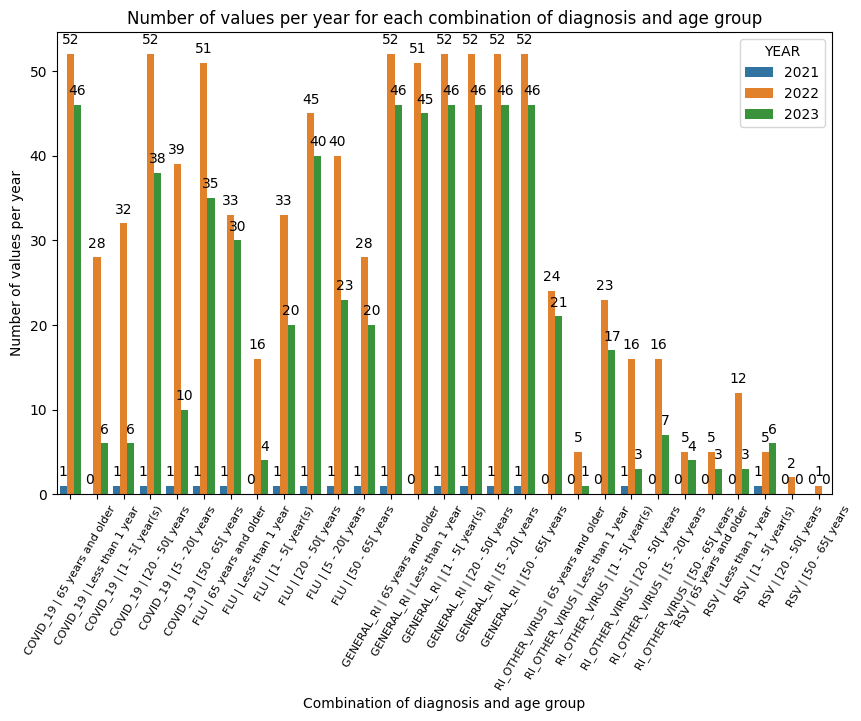

In [84]:

import seaborn as sns

result_df['COMBI_DIAG_AGE'] = result_df['DIAGNOSIS_CATEGORY'] + ' | ' + result_df['AGE_CLASS']

# Créer un graphique en bar plot pour le nombre de valeurs par année par combinaison DIAGNOSIS_CATEGORY et CLASS_AGE
result_df['YEAR'] = result_df['WEEK_LABEL'].dt.year

result_df = result_df.sort_values(by='COMBI_DIAG_AGE')

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='COMBI_DIAG_AGE', hue='YEAR', data=result_df)

# Ajouter des annotations au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of values per year for each combination of diagnosis and age group', fontsize=12)
plt.xlabel('Combination of diagnosis and age group', fontsize=10)
plt.ylabel('Number of values per year', fontsize=10)
plt.xticks(rotation=60, fontsize=8)
plt.show()

## Resolve Missing Data 

In [85]:
result_df = result_df.drop(columns='COMBI_DIAG_AGE')
result_df = result_df.drop(columns='YEAR')

In [86]:
from itertools import product

weeks = pd.date_range(start=result_df['WEEK_LABEL'].min(), end=result_df['WEEK_LABEL'].max(), freq='W-Mon')


categories_age = result_df['AGE_CLASS'].unique()
diagnosis_categories = result_df['DIAGNOSIS_CATEGORY'].unique()

combinations = list(product(weeks, diagnosis_categories, categories_age))

columns = ['WEEK_LABEL', 'DIAGNOSIS_CATEGORY', 'AGE_CLASS']
all_combinations_df = pd.DataFrame(combinations, columns=columns)

merged_df = pd.merge(all_combinations_df, result_df, on=['WEEK_LABEL', 'AGE_CLASS', 'DIAGNOSIS_CATEGORY'], how='outer')

merged_df = merged_df.sort_values(by='WEEK_LABEL')

merged_df['PASSAGE_DIAG_NB'] = merged_df['PASSAGE_DIAG_NB'].fillna(0)

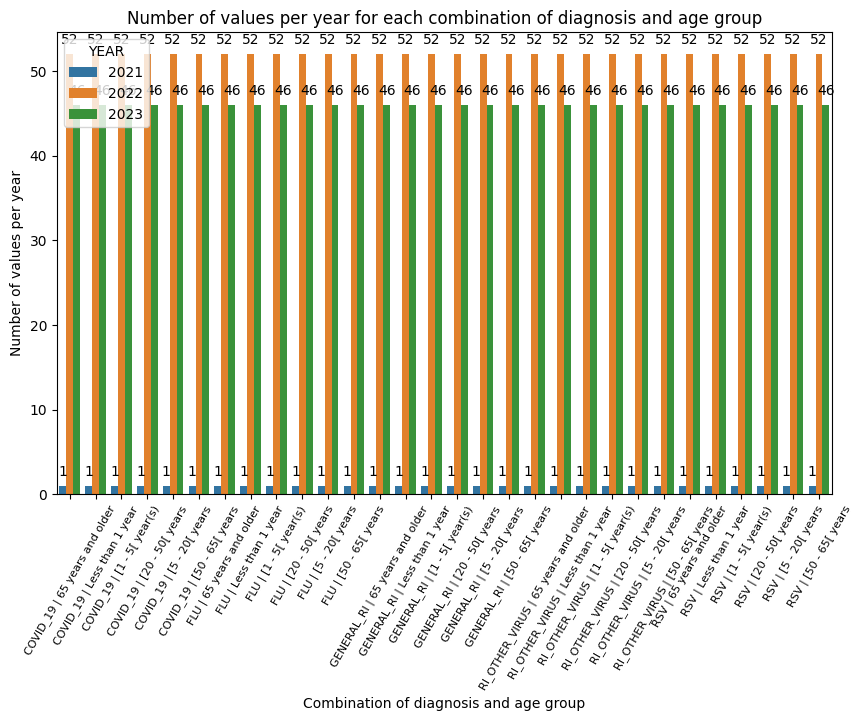

In [87]:
merged_df['COMBI_DIAG_AGE'] = merged_df['DIAGNOSIS_CATEGORY'] + ' | ' + merged_df['AGE_CLASS']

# Créer un graphique en bar plot pour le nombre de valeurs par année par combinaison DIAGNOSIS_CATEGORY et CLASS_AGE
merged_df['YEAR'] = merged_df['WEEK_LABEL'].dt.year

merged_df = merged_df.sort_values(by='COMBI_DIAG_AGE')

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='COMBI_DIAG_AGE', hue='YEAR', data=merged_df)

# Ajouter des annotations au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of values per year for each combination of diagnosis and age group', fontsize=12)
plt.xlabel('Combination of diagnosis and age group', fontsize=10)
plt.ylabel('Number of values per year', fontsize=10)
plt.xticks(rotation=60, fontsize=8)
plt.show()

In [88]:
merged_df

,WEEK_LABEL,DIAGNOSIS_CATEGORY,AGE_CLASS,PASSAGE_DIAG_NB,COMBI_DIAG_AGE,YEAR
0,2021-12-27,COVID_19,65 years and older,23.0,COVID_19 | 65 years and older,2021
480,2022-04-18,COVID_19,65 years and older,41.0,COVID_19 | 65 years and older,2022
2460,2023-07-24,COVID_19,65 years and older,2.0,COVID_19 | 65 years and older,2023
510,2022-04-25,COVID_19,65 years and older,35.0,COVID_19 | 65 years and older,2022
540,2022-05-02,COVID_19,65 years and older,22.0,COVID_19 | 65 years and older,2022
...,...,...,...,...,...,...
2909,2023-10-30,RSV,[50 - 65[ years,0.0,RSV | [50 - 65[ years,2023
1079,2022-08-29,RSV,[50 - 65[ years,0.0,RSV | [50 - 65[ years,2022
1289,2022-10-17,RSV,[50 - 65[ years,0.0,RSV | [50 - 65[ years,2022
1799,2023-02-13,RSV,[50 - 65[ years,0.0,RSV | [50 - 65[ years,2023


## Smooth Number of Patients

In [89]:
import pandas as pd
from scipy.signal.windows import gaussian
from scipy.signal import convolve
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_df is your original DataFrame
unique_combinations = merged_df['COMBI_DIAG_AGE'].unique()

# List to store historical dataframes for each combination
df_smoothed_dataframes = []

# Set up the number of rows and columns for subplots
num_rows = len(unique_combinations) // 2 + len(unique_combinations) % 2
num_cols = 2

# # Create subplots
#fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
#axes = axes.flatten()

for i, combo in enumerate(unique_combinations):
    # Create a subplot for each combination
    #ax = axes[i]

    filtered_df = merged_df.loc[merged_df['COMBI_DIAG_AGE'] == combo]
    filtered_df = filtered_df.sort_values(by='WEEK_LABEL')
    filtered_df['PASSAGE_DIAG_NB'] = filtered_df['PASSAGE_DIAG_NB'].astype(int)
    filtered_df['WEEK_LABEL'] = pd.to_datetime(filtered_df['WEEK_LABEL'])

    # Copy the filtered dataframe to avoid modifying the original
    smoothed_dataframes = filtered_df.copy()

    # Ensure 'WEEK_LABEL' is of type datetime
    smoothed_dataframes['WEEK_LABEL'] = pd.to_datetime(smoothed_dataframes['WEEK_LABEL'])

    # Sort the DataFrame by date
    smoothed_dataframes = smoothed_dataframes.sort_values(by='WEEK_LABEL')

    # Define the Gaussian window
    window_size = 5
    STD = 4
    gaussian_window = gaussian(window_size, std=STD)
    gaussian_window /= gaussian_window.sum()

    # Apply convolution with 'same' option
    smoothed = convolve(smoothed_dataframes['PASSAGE_DIAG_NB'].values, gaussian_window, mode='same')

    # Add the 'SMOOTHED_PASSAGE_DIAG_NB' column to the DataFrame
    smoothed_dataframes['SMOOTHED_PASSAGE_DIAG_NB'] = smoothed

    # Calculate variance for confidence interval
    variance = convolve((smoothed_dataframes['PASSAGE_DIAG_NB'].values - smoothed) ** 2, gaussian_window, mode='same')

    # Calculate standard deviation
    std_dev = variance ** 0.5

    # Set the confidence level (e.g., 95%)
    confidence_level = 0.95

    # Calculate the standard error
    margin_of_error = std_dev * 1.96  # For a 95% confidence interval

    # Add confidence interval columns to the DataFrame
    smoothed_dataframes['LOWER_CI_PASSAGE_DIAG_NB'] = smoothed_dataframes['SMOOTHED_PASSAGE_DIAG_NB'] - margin_of_error
    smoothed_dataframes['UPPER_CI_PASSAGE_DIAG_NB'] = smoothed_dataframes['SMOOTHED_PASSAGE_DIAG_NB'] + margin_of_error

    # Sort the DataFrame by date
    smoothed_dataframes.sort_values(by='WEEK_LABEL', inplace=True)

    # Check and replace NaN values with 0 in the columns used
    smoothed_dataframes['LOWER_CI_PASSAGE_DIAG_NB'] = smoothed_dataframes['LOWER_CI_PASSAGE_DIAG_NB'].clip(lower=0)
    
    # Check for NaN values in the confidence interval columns
    lower_ci_smoothed = np.where(np.isnan(smoothed_dataframes['LOWER_CI_PASSAGE_DIAG_NB']), 0, smoothed_dataframes['LOWER_CI_PASSAGE_DIAG_NB'])
    upper_ci_smoothed = np.where(np.isnan(smoothed_dataframes['UPPER_CI_PASSAGE_DIAG_NB']), 0, smoothed_dataframes['UPPER_CI_PASSAGE_DIAG_NB'])

    # # Plot PASSAGE_DIAG_NB in blue
    # ax.plot(smoothed_dataframes['WEEK_LABEL'], smoothed_dataframes['PASSAGE_DIAG_NB'], label=f'Emergency Room Admissions ({combo})')

    # # Plot SMOOTHED_PASSAGE_DIAG_NB in red
    # ax.plot(smoothed_dataframes['WEEK_LABEL'], smoothed_dataframes['SMOOTHED_PASSAGE_DIAG_NB'], label=f'Smoothed N ({combo})')

    # # Fill the confidence interval with reduced transparency (alpha=0.2)
    # ax.fill_between(smoothed_dataframes['WEEK_LABEL'], lower_ci_smoothed, upper_ci_smoothed, alpha=0.2, label=f'Confidence Interval (95%) ({combo})')

    # # Add legends and a title
    # ax.legend()
    # ax.set_title(f'Emergency Room Admissions ({combo})')
    # ax.set_xlabel('Weeks')
    # ax.set_ylabel('Number of patients')
    # ax.tick_params(axis='x', rotation=60)

    # Append the smoothed dataframe to the list
    df_smoothed_dataframes.append(smoothed_dataframes)

# # Adjust layout
# plt.tight_layout()
# # Show the plot
# plt.show()

# Concatenate all historical dataframes in the list
final_smoothed_dataframe = pd.concat(df_smoothed_dataframes, ignore_index=True)
final_smoothed_dataframe

,WEEK_LABEL,DIAGNOSIS_CATEGORY,AGE_CLASS,PASSAGE_DIAG_NB,COMBI_DIAG_AGE,YEAR,SMOOTHED_PASSAGE_DIAG_NB,LOWER_CI_PASSAGE_DIAG_NB,UPPER_CI_PASSAGE_DIAG_NB
0,2021-12-27,COVID_19,65 years and older,23,COVID_19 | 65 years and older,2021,38.840016,5.049022,72.631011
1,2022-01-03,COVID_19,65 years and older,91,COVID_19 | 65 years and older,2022,56.726852,22.408369,91.045334
2,2022-01-10,COVID_19,65 years and older,81,COVID_19 | 65 years and older,2022,77.880885,38.230793,117.530977
3,2022-01-17,COVID_19,65 years and older,85,COVID_19 | 65 years and older,2022,89.084481,51.743254,126.425707
4,2022-01-24,COVID_19,65 years and older,107,COVID_19 | 65 years and older,2022,82.286184,57.695395,106.876973
...,...,...,...,...,...,...,...,...,...
2965,2023-10-16,RSV,[50 - 65[ years,0,RSV | [50 - 65[ years,2023,0.000000,0.000000,0.000000
2966,2023-10-23,RSV,[50 - 65[ years,0,RSV | [50 - 65[ years,2023,0.000000,0.000000,0.000000
2967,2023-10-30,RSV,[50 - 65[ years,0,RSV | [50 - 65[ years,2023,0.000000,0.000000,0.000000
2968,2023-11-06,RSV,[50 - 65[ years,0,RSV | [50 - 65[ years,2023,0.000000,0.000000,0.000000


## Baseline - Number of Patients

In [90]:
import pandas as pd

# Liste unique des combinaisons de diagnostic et d'âge
unique_combinations = final_smoothed_dataframe['COMBI_DIAG_AGE'].unique()

# Liste pour stocker les DataFrames résultants pour chaque combinaison
result_dataframes = []

# Définir le décalage d'un an
one_year_shift = pd.DateOffset(weeks=52)

# Boucle sur chaque combinaison
for combo in unique_combinations:
    # Filtrer le DataFrame pour la combinaison actuelle
    df = final_smoothed_dataframe[final_smoothed_dataframe['COMBI_DIAG_AGE'] == combo].copy()

    # Ajouter une colonne 'WEEK_LABEL_1YR_AGO' pour stocker la date correspondante il y a un an
    df['WEEK_LABEL_1YR_AGO'] = df['WEEK_LABEL'] - one_year_shift

    # Fusionner avec lui-même pour obtenir les valeurs de l'année précédente
    merged_df = pd.merge(
        df,
        df[['WEEK_LABEL', 'SMOOTHED_PASSAGE_DIAG_NB', 'LOWER_CI_PASSAGE_DIAG_NB', 'UPPER_CI_PASSAGE_DIAG_NB']],
        left_on='WEEK_LABEL_1YR_AGO',
        right_on='WEEK_LABEL',
        suffixes=('', '_1YR_AGO'),
        how='left'
    )

    # Remplacer les valeurs manquantes par celles de l'année précédente
    merged_df['SMOOTHED_PASSAGE_DIAG_NB_1YR_AGO'].fillna(merged_df['SMOOTHED_PASSAGE_DIAG_NB'], inplace=True)
    merged_df['LOWER_CI_PASSAGE_DIAG_NB_1YR_AGO'].fillna(merged_df['LOWER_CI_PASSAGE_DIAG_NB'], inplace=True)
    merged_df['UPPER_CI_PASSAGE_DIAG_NB_1YR_AGO'].fillna(merged_df['UPPER_CI_PASSAGE_DIAG_NB'], inplace=True)

    # Supprimer la colonne 'WEEK_LABEL_1YR_AGO'
    merged_df.drop(['WEEK_LABEL_1YR_AGO'], axis=1, inplace=True)

    # Ajouter le DataFrame résultant à la liste
    result_dataframes.append(merged_df)

# Concaténer tous les DataFrames résultants
final_result_dataframe = pd.concat(result_dataframes, ignore_index=True)

# Afficher les 50 dernières lignes du DataFrame final résultant
final_result_dataframe.rename(columns={'SMOOTHED_PASSAGE_DIAG_NB_1YR_AGO': 'BASELINE_PASSAGE_DIAG_NB'}, inplace=True)
final_result_dataframe.rename(columns={'LOWER_CI_PASSAGE_DIAG_NB_1YR_AGO': 'LOWER_CI_BASELINE_PASSAGE_DIAG_NB'}, inplace=True)
final_result_dataframe.rename(columns={'UPPER_CI_PASSAGE_DIAG_NB_1YR_AGO': 'UPPER_CI_BASELINE_PASSAGE_DIAG_NB'}, inplace=True)


age_class_order = ['Less than 1 year', '[1 - 5[ year(s)', '[5 - 20[ years', '[20 - 50[ years', '[50 - 65[ years', '65 years and older']

final_result_dataframe = final_result_dataframe.sort_values(by=['WEEK_LABEL', 'DIAGNOSIS_CATEGORY', 'AGE_CLASS'], 
                           key=lambda x: pd.Categorical(x, categories=age_class_order, ordered=True))

final_result_dataframe = final_result_dataframe.drop(['COMBI_DIAG_AGE', 'YEAR'], axis=1)


final_result_dataframe

,WEEK_LABEL,DIAGNOSIS_CATEGORY,AGE_CLASS,PASSAGE_DIAG_NB,SMOOTHED_PASSAGE_DIAG_NB,LOWER_CI_PASSAGE_DIAG_NB,UPPER_CI_PASSAGE_DIAG_NB,BASELINE_PASSAGE_DIAG_NB,LOWER_CI_BASELINE_PASSAGE_DIAG_NB,UPPER_CI_BASELINE_PASSAGE_DIAG_NB
99,2021-12-27,COVID_19,Less than 1 year,0,0.0,0.0,0.000000,0.0,0.0,0.000000
100,2022-01-03,COVID_19,Less than 1 year,0,0.0,0.0,0.000000,0.0,0.0,0.000000
101,2022-01-10,COVID_19,Less than 1 year,0,0.0,0.0,0.000000,0.0,0.0,0.000000
102,2022-01-17,COVID_19,Less than 1 year,0,0.0,0.0,0.318588,0.0,0.0,0.318588
103,2022-01-24,COVID_19,Less than 1 year,0,0.0,0.0,0.483637,0.0,0.0,0.483637
...,...,...,...,...,...,...,...,...,...,...
2470,2023-10-16,RSV,65 years and older,0,0.0,0.0,0.000000,0.0,0.0,0.000000
2471,2023-10-23,RSV,65 years and older,0,0.0,0.0,0.000000,0.0,0.0,0.000000
2472,2023-10-30,RSV,65 years and older,0,0.0,0.0,0.000000,0.0,0.0,0.000000
2473,2023-11-06,RSV,65 years and older,0,0.0,0.0,0.000000,0.0,0.0,0.000000


## Fraction of Cases

In [91]:
def calculate_fraction_and_total(dataframe, column_name, total_column_name, fraction_column_name):
    # Somme des colonnes pour chaque semaine et classe d'âge
    total_column = dataframe.groupby(['WEEK_LABEL', 'AGE_CLASS'], as_index=False)[column_name].sum()

    # Renommer la colonne pour refléter qu'il s'agit du total
    total_column = total_column.rename(columns={column_name: total_column_name})
    

    # Fusionner le dataframe principal avec le total
    dataframe = pd.merge(dataframe, total_column, on=['WEEK_LABEL', 'AGE_CLASS'])
    
    # Créer la colonne FRACTION
    dataframe[fraction_column_name] = dataframe[column_name] / dataframe[total_column_name]
    
    dataframe = dataframe.drop(total_column_name, axis=1)

    return dataframe

# Appliquer la fonction pour PASSAGE_DIAG_NB
final_result_dataframe = calculate_fraction_and_total(final_result_dataframe, 'PASSAGE_DIAG_NB', 'TOTAL_NB_OF_PATIENTS', 'FRACTION_OF_CASES')

# Appliquer la fonction pour SMOOTHED_PASSAGE_DIAG_NB
final_result_dataframe = calculate_fraction_and_total(final_result_dataframe, 'SMOOTHED_PASSAGE_DIAG_NB', 'TOTAL_NB_OF_SMOOTHED', 'FRACTION_OF_CASES_SMOOTHED')

# Appliquer la fonction pour BASELINE_PASSAGE_DIAG_NB
final_result_dataframe = calculate_fraction_and_total(final_result_dataframe, 'BASELINE_PASSAGE_DIAG_NB', 'TOTAL_NB_OF_BASELINE', 'FRACTION_OF_CASES_BASELINE')


final_result_dataframe

,WEEK_LABEL,DIAGNOSIS_CATEGORY,AGE_CLASS,PASSAGE_DIAG_NB,SMOOTHED_PASSAGE_DIAG_NB,LOWER_CI_PASSAGE_DIAG_NB,UPPER_CI_PASSAGE_DIAG_NB,BASELINE_PASSAGE_DIAG_NB,LOWER_CI_BASELINE_PASSAGE_DIAG_NB,UPPER_CI_BASELINE_PASSAGE_DIAG_NB,FRACTION_OF_CASES,FRACTION_OF_CASES_SMOOTHED,FRACTION_OF_CASES_BASELINE
0,2021-12-27,COVID_19,Less than 1 year,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1,2021-12-27,FLU,Less than 1 year,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
2,2021-12-27,GENERAL_RI,Less than 1 year,0,0.562881,0.000000,1.651647,0.562881,0.000000,1.651647,NaN,1.000000,1.000000
3,2021-12-27,RI_OTHER_VIRUS,Less than 1 year,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
4,2021-12-27,RSV,Less than 1 year,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2023-11-13,COVID_19,65 years and older,4,7.337189,0.979310,13.695069,23.951218,14.134512,33.767925,0.153846,0.231866,0.326527
2966,2023-11-13,FLU,65 years and older,0,0.000000,0.000000,0.483637,0.750509,0.000000,3.810549,0.000000,0.000000,0.010232
2967,2023-11-13,GENERAL_RI,65 years and older,22,24.306849,8.098446,40.515251,48.274474,37.584631,58.964316,0.846154,0.768134,0.658126
2968,2023-11-13,RI_OTHER_VIRUS,65 years and older,0,0.000000,0.000000,0.318588,0.375254,0.000000,1.368995,0.000000,0.000000,0.005116


In [1270]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming your DataFrame is named 'your_dataframe'
# unique_combinations = final_result_dataframe['COMBI_DIAG_AGE'].unique()

# # Set up the number of rows and columns for subplots
# num_rows = len(unique_combinations) // 2 + len(unique_combinations) % 2
# num_cols = 2

# # Create subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
# axes = axes.flatten()

# for i, combo in enumerate(unique_combinations):
#     # Create a subplot for each combination
    
#     ax = axes[i]

#     # Filter the data for the current combination
#     df = final_result_dataframe[final_result_dataframe['COMBI_DIAG_AGE'] == combo].copy()
    

    
#     # Plot PASSAGE_DIAG_NB in blue
#     ax.plot(df['WEEK_LABEL'], df['PASSAGE_DIAG_NB'], label='PASSAGE_DIAG_NB', color='blue')

#     # Plot SMOOTHED_PASSAGE_DIAG_NB in red with confidence interval
#     ax.plot(df['WEEK_LABEL'], df['SMOOTHED_PASSAGE_DIAG_NB'], label='SMOOTHED_PASSAGE_DIAG_NB', color='red')
#     #ax.fill_between(df['WEEK_LABEL'], df['LOWER_CI_PASSAGE_DIAG_NB'], df['UPPER_CI_PASSAGE_DIAG_NB'], color='red', alpha=0.2, label='CCI (95%)')



#     # Plot BASELINE_PASSAGE_DIAG_NB in violet with confidence interval
#     ax.plot(df['WEEK_LABEL'], df['BASELINE_PASSAGE_DIAG_NB'], label='BASELINE_PASSAGE_DIAG_NB', color='violet')
#     #ax.fill_between(df['WEEK_LABEL'], df['LOWER_CI_BASELINE_PASSAGE_DIAG_NB'], df['UPPER_CI_BASELINE_PASSAGE_DIAG_NB'], color='violet', alpha=0.2, label='CCI (95%)')

#     # Add legends and a title
#     ax.legend()
#     ax.set_title(f'Emergency Room Admissions ({combo})')
#     ax.set_xlabel('Weeks')
#     ax.set_ylabel('Number of patients')
#     ax.tick_params(axis='x', rotation=60)

# # Adjust layout
# plt.tight_layout()
# # Show the plot
# plt.show()
